#📌 Extracción

## Paso 1: Importar librerías


In [8]:
# Importar json para manejar archivos JSON
# Importar pandas para la manipulación de datos
# Importar bibliotecas para preprocessing
import json
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Paso 2: Cargar datos desde el archivo JSON

In [9]:
# Leer el archivo JSON localizado en la carpeta del notebook
with open('TelecomX_Data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

## Paso 3: Convertir los datos a un DataFrame de pandas

In [10]:
# Normalizar la estructura JSON y convertirla en un DataFrame
df = pd.json_normalize(data)

# Mostrar las primeras filas para verificar la carga
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#Diccionario de datos

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

#🔧 Transformación

In [11]:
# Mostrar el tamaño del DataFrame (filas y columnas)
df.shape

(7267, 21)

In [12]:
# Mostrar las columnas y tipos de datos
print(df.info())

# Estadísticas básicas de variables numéricas
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,count,mean,std,min,25%,50%,75%,max
customer.SeniorCitizen,7267.0,0.162653,0.369074,0.00,0.000,0.0,0.000,1.00
customer.tenure,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00
account.Charges.Monthly,7267.0,64.720098,30.129572,18.25,35.425,70.3,89.875,118.75


In [13]:
# Revisar conteo de la variable objetivo
print(df['Churn'].value_counts(normalize=True))

Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


In [14]:
# Eliminar filas donde Churn está vacío
df.drop(df[df['Churn'] == ''].index, inplace=True)

# Revisar conteo de la variable objetivo
print(df['Churn'].value_counts(normalize=True))

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [15]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [16]:
df.tail()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [17]:
# Eliminar filas donde account.Charges.Total está vacío
df.drop(df[df['account.Charges.Total'] == ''].index, inplace=True)

# Eliminar filas donde account.Charges.Total está en blanco
df.drop(df[df['account.Charges.Total'] == ' '].index, inplace=True)

# Convertir la columna a tipo float64
df['account.Charges.Total'] = df['account.Charges.Total'].astype('float64')

In [18]:
# Identificar columnas de tipo texto (object)
text_columns = df.select_dtypes(include="object").columns

# Normalizar: convertir a minúsculas, eliminar espacios extra y caracteres especiales
df[text_columns] = df[text_columns].apply(
    lambda col: col.str.lower().str.strip().str.replace(r"[^\w\s]", "", regex=True)
)

# Mostrar una muestra de las columnas normalizadas
df[text_columns].head()

,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod
0,0002orfbo,no,female,yes,yes,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check
1,0003mknfe,no,male,no,no,yes,yes,dsl,no,no,no,no,no,yes,monthtomonth,no,mailed check
2,0004tlhlj,yes,male,no,no,yes,no,fiber optic,no,no,yes,no,no,no,monthtomonth,yes,electronic check
3,0011igkff,yes,male,yes,no,yes,no,fiber optic,no,yes,yes,no,yes,yes,monthtomonth,yes,electronic check
4,0013exchz,yes,female,yes,no,yes,no,fiber optic,no,no,no,yes,yes,no,monthtomonth,yes,mailed check


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

In [20]:
# Resetear el índice del DataFrame
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   objec

In [21]:
# Identificar columnas categóricas
cat_columns = df.select_dtypes(include="object").columns
cat_columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.Partner',
       'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines',
       'internet.InternetService', 'internet.OnlineSecurity',
       'internet.OnlineBackup', 'internet.DeviceProtection',
       'internet.TechSupport', 'internet.StreamingTV',
       'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')

In [22]:
# Separar columnas según cantidad de valores únicos
label_cols = [col for col in cat_columns if df[col].nunique() <= 10]
onehot_cols = [col for col in cat_columns if df[col].nunique() > 10]
print(label_cols)
print(onehot_cols)

['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']
['customerID']


In [23]:
# Codificación con LabelEncoder
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [24]:
# Combinar todo en df_cod
df_cod = pd.concat([df.drop(columns=onehot_cols).reset_index(drop=True)], axis=1)

In [25]:
df_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer.gender            7032 non-null   int64  
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   int64  
 4   customer.Dependents        7032 non-null   int64  
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   int64  
 7   phone.MultipleLines        7032 non-null   int64  
 8   internet.InternetService   7032 non-null   int64  
 9   internet.OnlineSecurity    7032 non-null   int64  
 10  internet.OnlineBackup      7032 non-null   int64  
 11  internet.DeviceProtection  7032 non-null   int64  
 12  internet.TechSupport       7032 non-null   int64  
 13  internet.StreamingTV       7032 non-null   int64

In [26]:
df_cod.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0,0,0,1,1,9,1,0,0,0,2,0,2,2,0,1,1,3,65.6,593.30
1,0,1,0,0,0,9,1,2,0,0,0,0,0,0,2,0,0,3,59.9,542.40
2,1,1,0,0,0,4,1,0,1,0,0,2,0,0,0,0,1,2,73.9,280.85
3,1,1,1,1,0,13,1,0,1,0,2,2,0,2,2,0,1,2,98.0,1237.85
4,1,0,1,1,0,3,1,0,1,0,0,0,2,2,0,0,1,3,83.9,267.40


## Exploración inicial del dataset
Primero vamos a inspeccionar rápidamente las columnas, sus tipos de datos y algunos resúmenes básicos para entender nuestra base antes de decidir qué variables usar.

In [27]:
# Revisar dimensiones y tipos de datos
df_cod.info()

# Mostrar las primeras filas
df_cod.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer.gender            7032 non-null   int64  
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   int64  
 4   customer.Dependents        7032 non-null   int64  
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   int64  
 7   phone.MultipleLines        7032 non-null   int64  
 8   internet.InternetService   7032 non-null   int64  
 9   internet.OnlineSecurity    7032 non-null   int64  
 10  internet.OnlineBackup      7032 non-null   int64  
 11  internet.DeviceProtection  7032 non-null   int64  
 12  internet.TechSupport       7032 non-null   int64  
 13  internet.StreamingTV       7032 non-null   int64

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0,0,0,1,1,9,1,0,0,0,2,0,2,2,0,1,1,3,65.60,593.30
1,0,1,0,0,0,9,1,2,0,0,0,0,0,0,2,0,0,3,59.90,542.40
2,1,1,0,0,0,4,1,0,1,0,0,2,0,0,0,0,1,2,73.90,280.85
3,1,1,1,1,0,13,1,0,1,0,2,2,0,2,2,0,1,2,98.00,1237.85
4,1,0,1,1,0,3,1,0,1,0,0,0,2,2,0,0,1,3,83.90,267.40
5,0,0,0,0,1,9,1,0,0,0,0,0,2,2,2,0,1,1,69.40,571.45
6,0,0,1,1,0,71,1,0,1,2,2,2,2,2,2,2,1,0,109.70,7904.25
7,0,1,0,1,0,63,1,2,1,2,0,0,2,0,0,2,1,1,84.65,5377.80
8,0,0,1,0,0,7,1,0,0,2,0,0,0,0,0,0,1,2,48.20,340.35
9,0,0,0,1,1,65,1,2,0,2,2,2,2,2,2,2,1,3,90.45,5957.90


In [28]:
# Estadísticas básicas de variables numéricas
df_cod.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00
customer.gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
customer.SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
customer.Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
customer.Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
customer.tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
phone.PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
phone.MultipleLines,7032.0,0.940557,0.948627,0.00,0.0000,1.000,2.0000,2.00
internet.InternetService,7032.0,0.872582,0.737271,0.00,0.0000,1.000,1.0000,2.00
internet.OnlineSecurity,7032.0,0.789249,0.859962,0.00,0.0000,1.000,2.0000,2.00


In [72]:
# Mostrar la fila donde account.Charges.Total es igual a 867245
display(df_cod[df_cod['account.Charges.Total'] == 7942.15])

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
32,0,1,0,1,0,66,1,2,1,2,...,2,2,2,2,1,0,0,115.8,7942.15,3.86


In [30]:
# Detección de valores faltantes
# Resumen por columna
df_cod.isnull().sum().sort_values(ascending=False)

,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0


#📊 Carga y análisis

In [31]:
# Crear la nueva columna 'Cuentas_Diarias' dividiendo 'Charges.Monthly' por 30
df_cod['Cuentas_Diarias'] = df_cod['account.Charges.Monthly'] / 30

# Resetear el índice del DataFrame
df_cod.reset_index(drop=True, inplace=True)

# Revisar dimensiones y tipos de datos
df_cod.info()

# Estadísticas básicas de variables numéricas
df_cod.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer.gender            7032 non-null   int64  
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   int64  
 4   customer.Dependents        7032 non-null   int64  
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   int64  
 7   phone.MultipleLines        7032 non-null   int64  
 8   internet.InternetService   7032 non-null   int64  
 9   internet.OnlineSecurity    7032 non-null   int64  
 10  internet.OnlineBackup      7032 non-null   int64  
 11  internet.DeviceProtection  7032 non-null   int64  
 12  internet.TechSupport       7032 non-null   int64  
 13  internet.StreamingTV       7032 non-null   int64

,count,mean,std,min,25%,50%,75%,max
Churn,7032.0,0.265785,0.441782,0.000000,0.00000,0.000,1.000000,1.000000
customer.gender,7032.0,0.504693,0.500014,0.000000,0.00000,1.000,1.000000,1.000000
customer.SeniorCitizen,7032.0,0.162400,0.368844,0.000000,0.00000,0.000,0.000000,1.000000
customer.Partner,7032.0,0.482509,0.499729,0.000000,0.00000,0.000,1.000000,1.000000
customer.Dependents,7032.0,0.298493,0.457629,0.000000,0.00000,0.000,1.000000,1.000000
customer.tenure,7032.0,32.421786,24.545260,1.000000,9.00000,29.000,55.000000,72.000000
phone.PhoneService,7032.0,0.903299,0.295571,0.000000,1.00000,1.000,1.000000,1.000000
phone.MultipleLines,7032.0,0.940557,0.948627,0.000000,0.00000,1.000,2.000000,2.000000
internet.InternetService,7032.0,0.872582,0.737271,0.000000,0.00000,1.000,1.000000,2.000000
internet.OnlineSecurity,7032.0,0.789249,0.859962,0.000000,0.00000,1.000,2.000000,2.000000


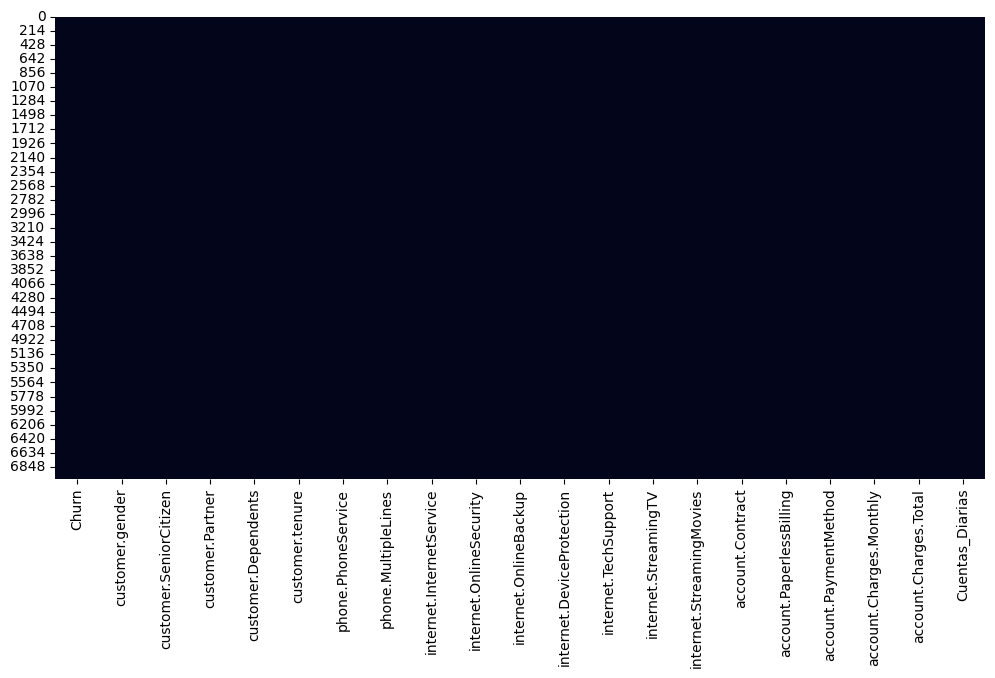

In [32]:
# Visualizar brechas con un mapa de calor sencillo
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df_cod.isnull(), cbar=False)
plt.show()

In [33]:
# Eliminar la columna customerID
df.drop(columns=['customerID'], inplace=True)

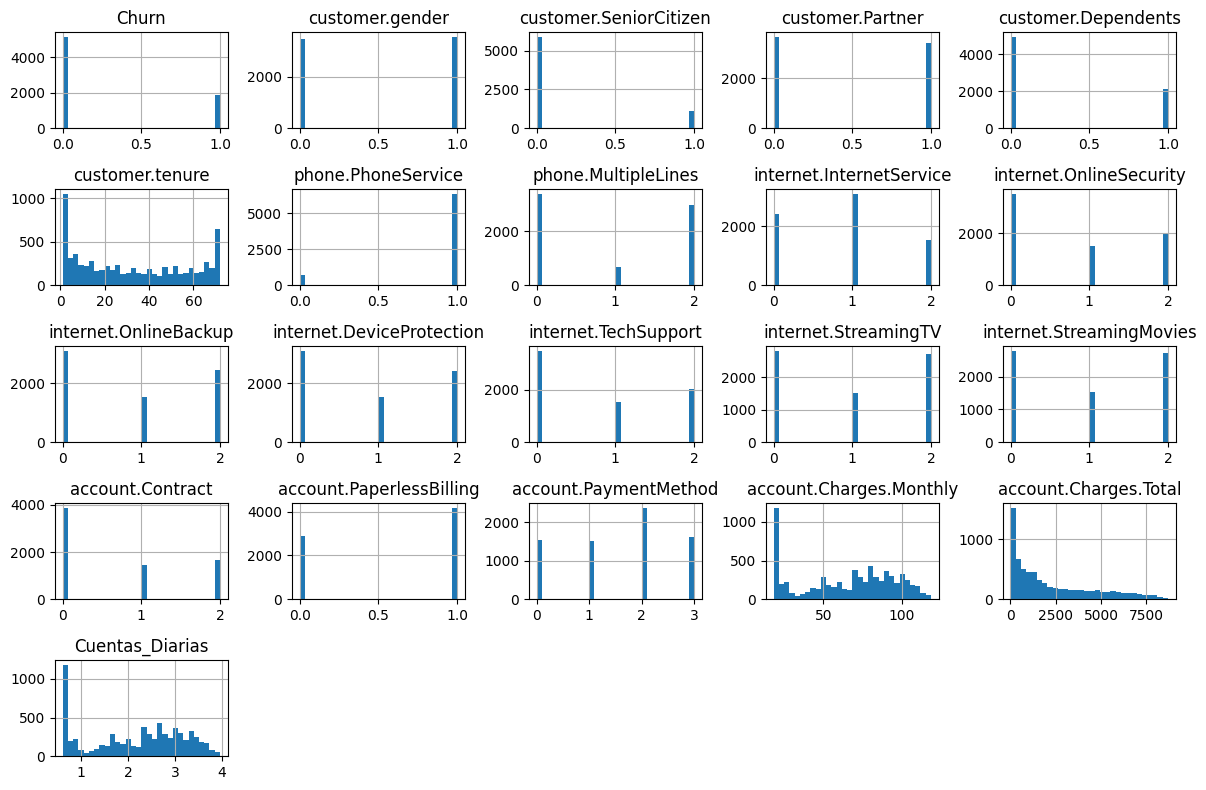

In [34]:
# Distribuciones de variables numéricas
# Histogramas
df_cod.select_dtypes(include='number').hist(bins=30, figsize=(12,8));
plt.tight_layout()

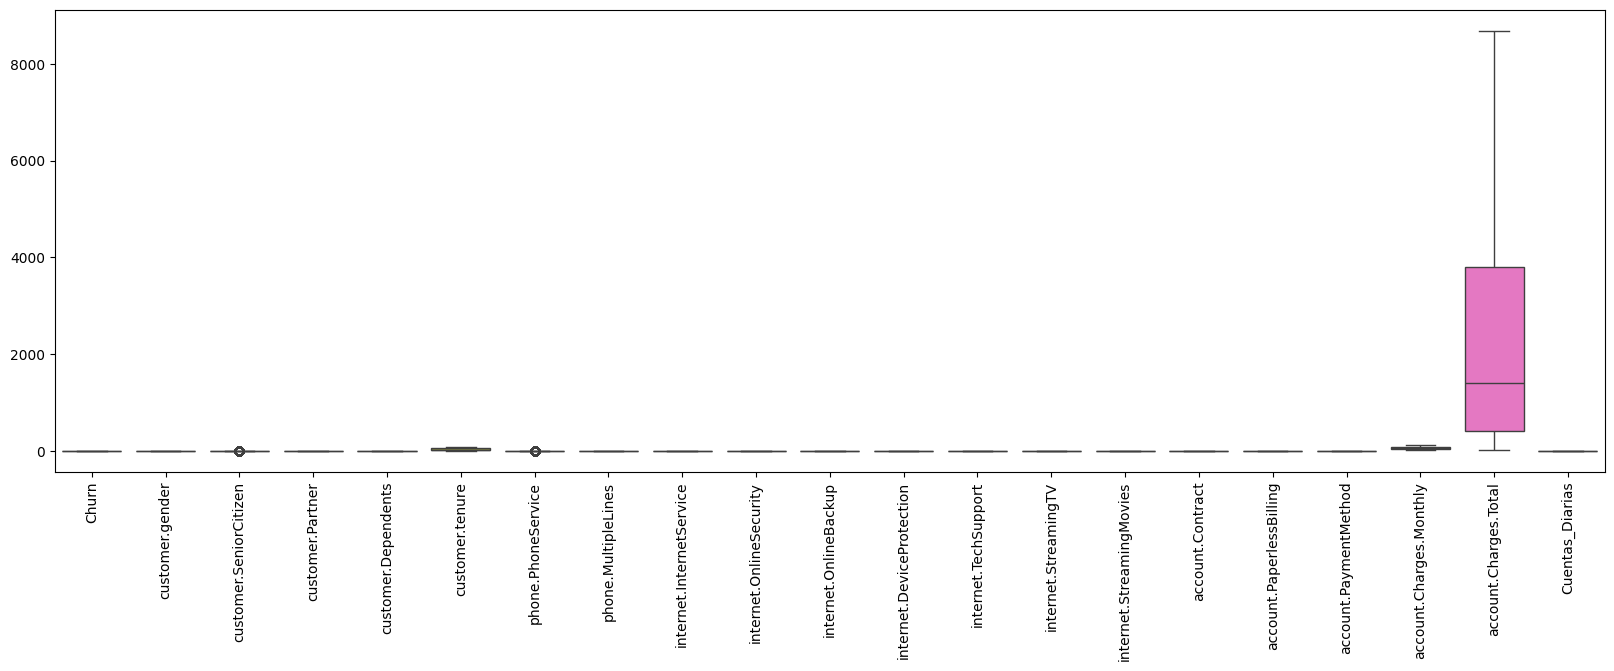

In [35]:
# Boxplots para outliers
plt.figure(figsize=(20,6))
sns.boxplot(data=df_cod.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.show()

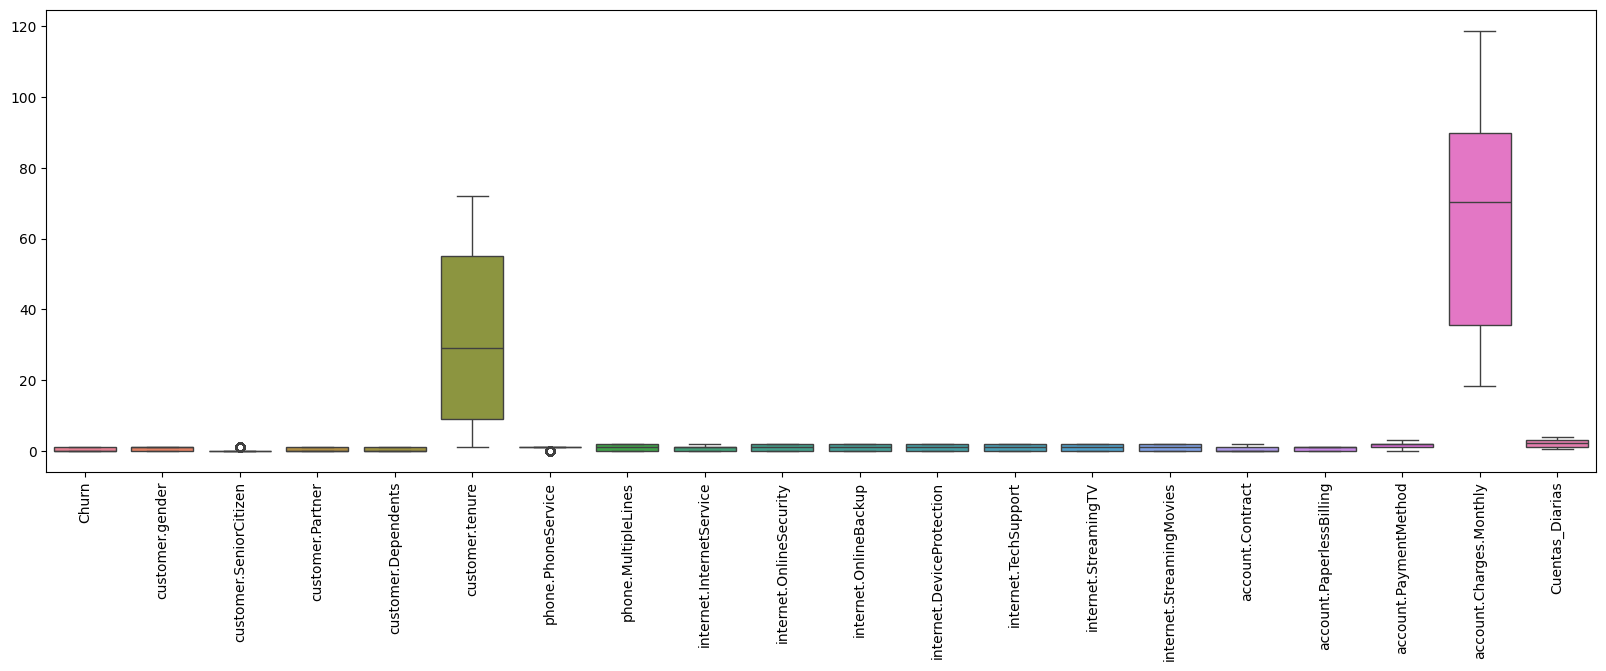

In [36]:
# Boxplots para outliers excluyendo la columna account.Charges.Total
plt.figure(figsize=(20,6))
sns.boxplot(data=df_cod.select_dtypes(include='number').drop(columns=['account.Charges.Total']))
plt.xticks(rotation=90)
plt.show()

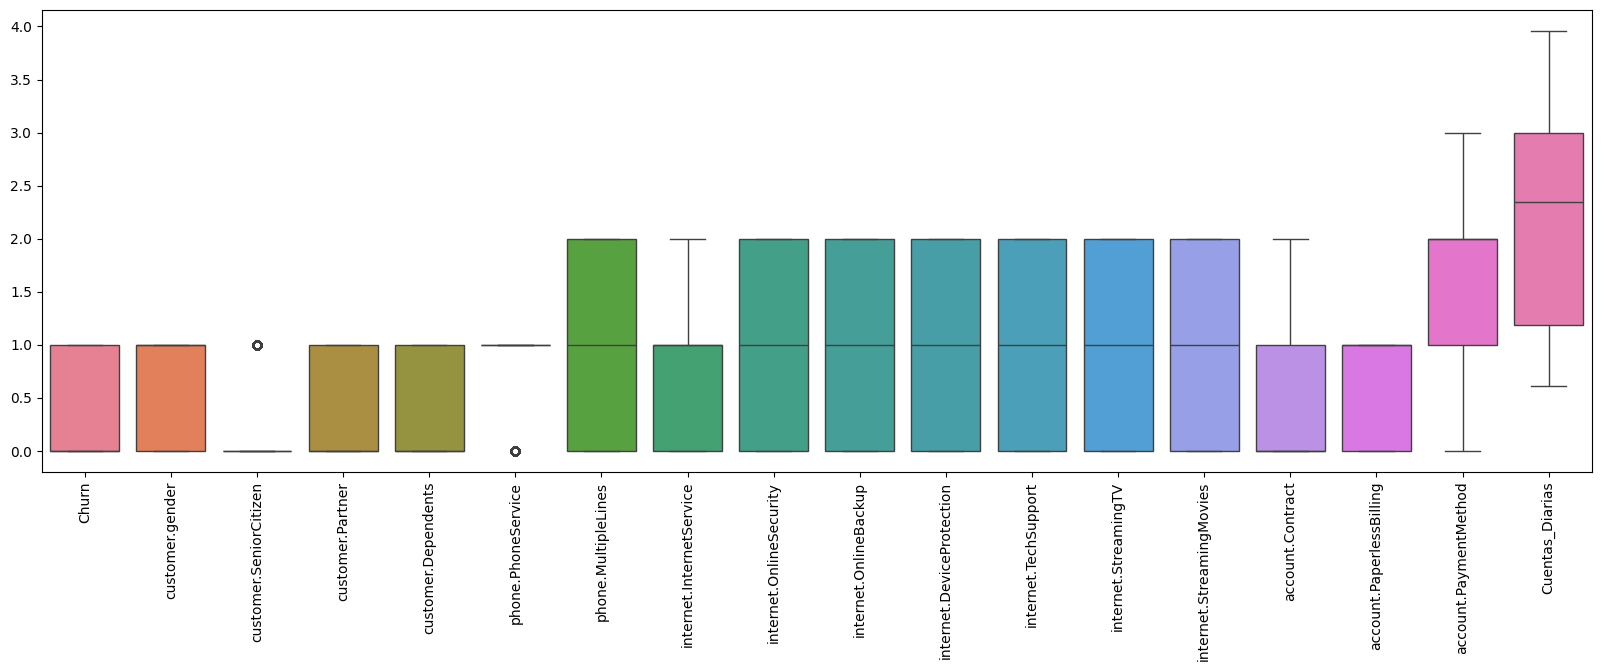

In [37]:
# Boxplots para outliers excluyendo la columna account.Charges.Total y account.Charges.Monthly
plt.figure(figsize=(20,6))
sns.boxplot(data=df_cod.select_dtypes(include='number').drop(columns=['account.Charges.Total', 'account.Charges.Monthly', 'customer.tenure']))
plt.xticks(rotation=90)
plt.show()

In [38]:
# Análisis de variables categóricas
# Conteo de categorías
for col in df_cod.select_dtypes(include='object'):
    print(col, df_cod[col].nunique())
    display(df_cod[col].value_counts().head(5))

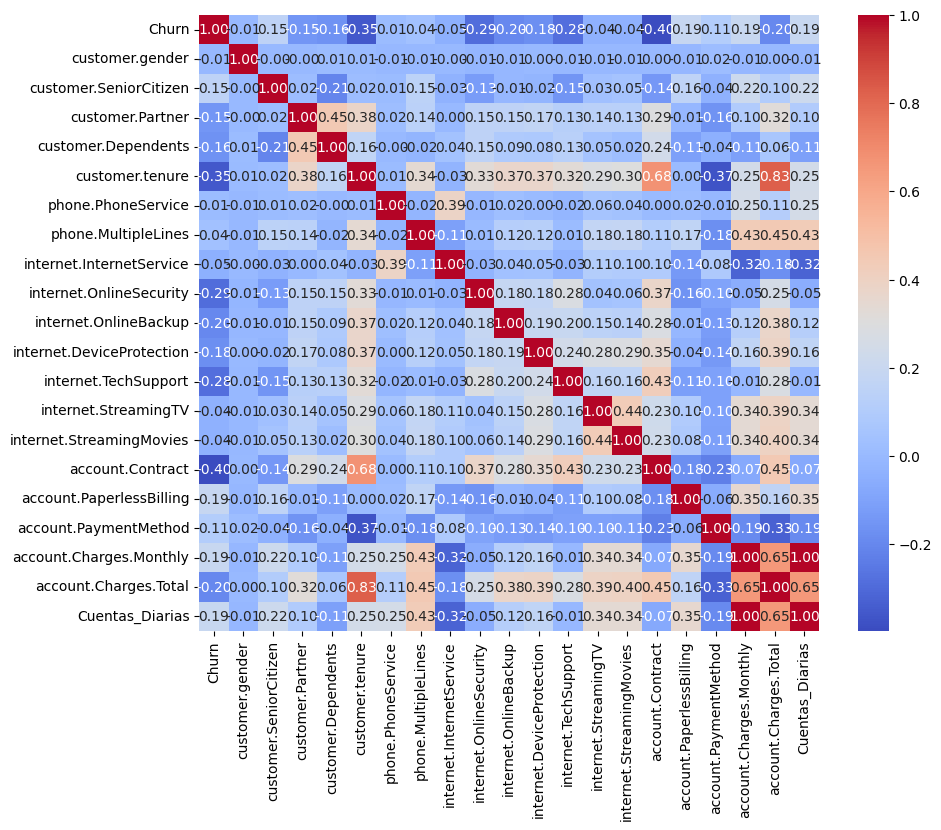

In [39]:
# Correlaciones y relaciones entre variables
# Matriz de correlación
corr = df_cod.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

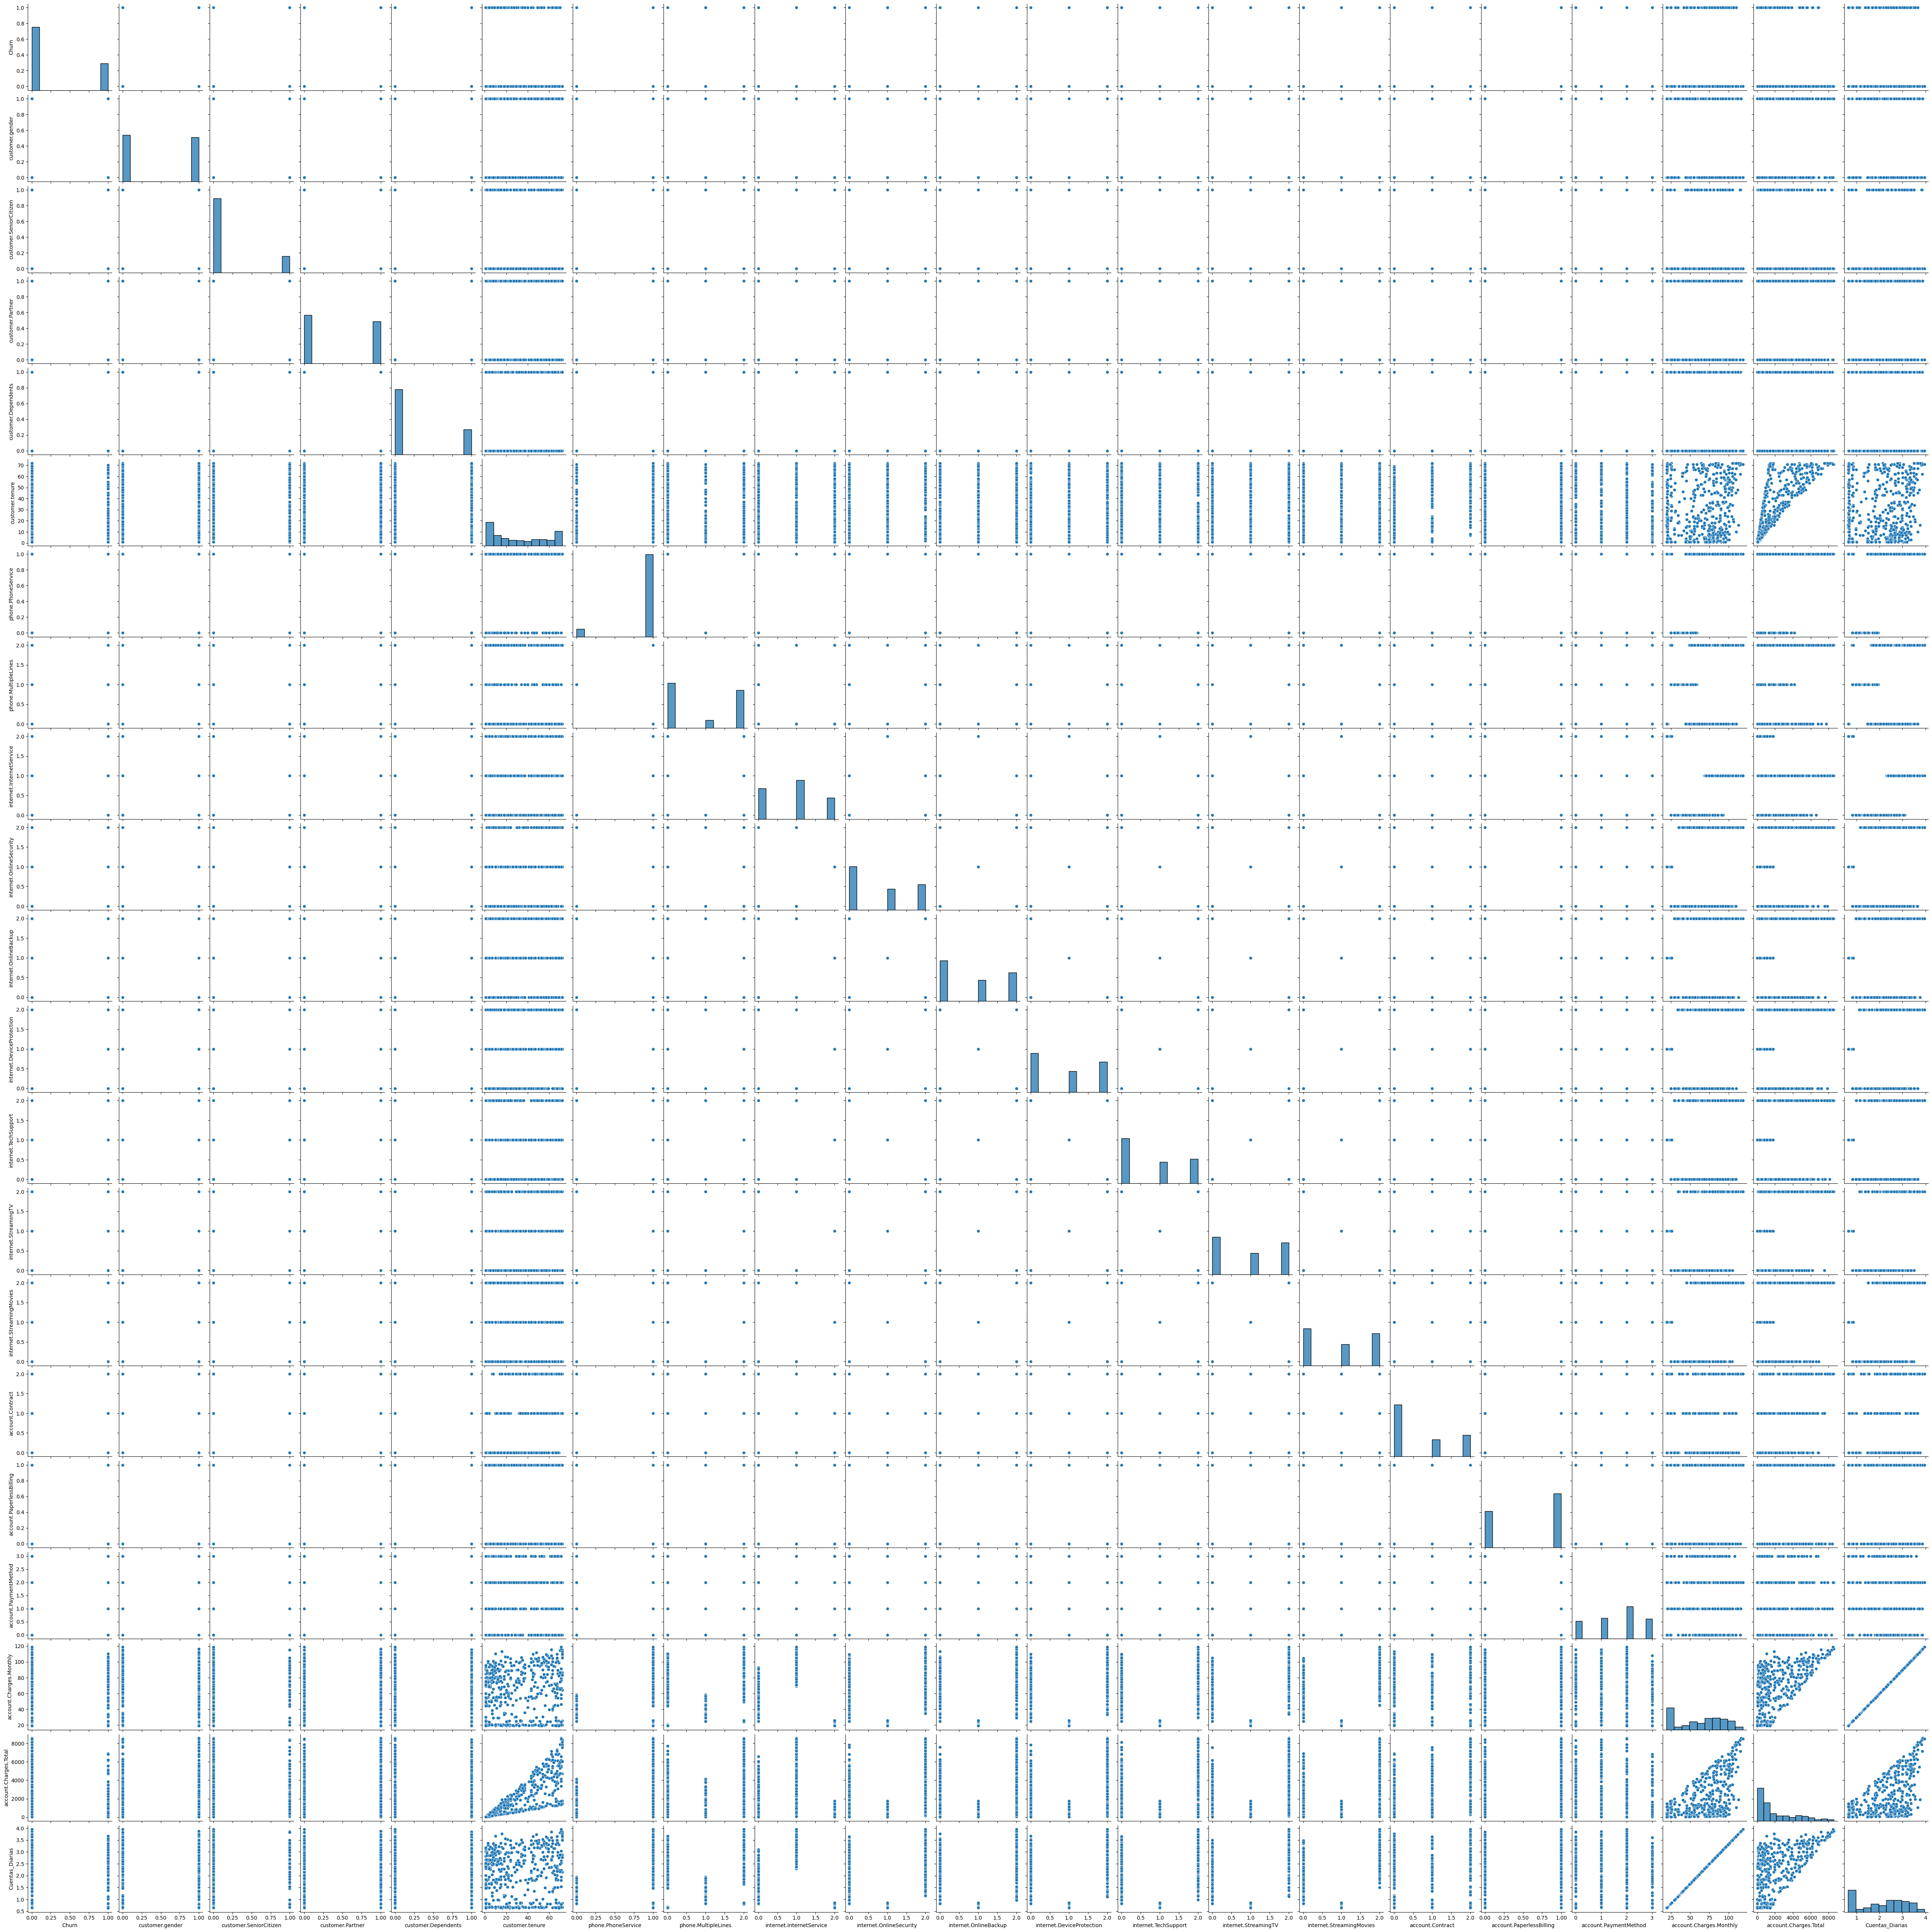

In [40]:
# Pairplot (muestra relaciones entre pares)
sns.pairplot(df_cod.select_dtypes(include='number').sample(500))
plt.show()

In [41]:
# Revisar dimensiones y tipos de datos
df_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer.gender            7032 non-null   int64  
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   int64  
 4   customer.Dependents        7032 non-null   int64  
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   int64  
 7   phone.MultipleLines        7032 non-null   int64  
 8   internet.InternetService   7032 non-null   int64  
 9   internet.OnlineSecurity    7032 non-null   int64  
 10  internet.OnlineBackup      7032 non-null   int64  
 11  internet.DeviceProtection  7032 non-null   int64  
 12  internet.TechSupport       7032 non-null   int64  
 13  internet.StreamingTV       7032 non-null   int64

In [42]:
# Estandarización Z-Score
# Cambiar los valores para que tengan media 0 y desviación estándar 1. PAra aplicar distribución gaussiana (como regresión lineal).
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_estandarizado = df_cod.copy()

# Estandariza columnas de mayores valores
cols_to_scale = ['account.Charges.Monthly', 'account.Charges.Total', 'customer.tenure', 'Cuentas_Diarias']
df_estandarizado[cols_to_scale] = scaler.fit_transform(df_estandarizado[cols_to_scale])

In [43]:
# Revisar dimensiones y tipos de datos
df_estandarizado.info()

# Estadísticas básicas de variables numéricas
df_estandarizado.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer.gender            7032 non-null   int64  
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   int64  
 4   customer.Dependents        7032 non-null   int64  
 5   customer.tenure            7032 non-null   float64
 6   phone.PhoneService         7032 non-null   int64  
 7   phone.MultipleLines        7032 non-null   int64  
 8   internet.InternetService   7032 non-null   int64  
 9   internet.OnlineSecurity    7032 non-null   int64  
 10  internet.OnlineBackup      7032 non-null   int64  
 11  internet.DeviceProtection  7032 non-null   int64  
 12  internet.TechSupport       7032 non-null   int64  
 13  internet.StreamingTV       7032 non-null   int64

,count,mean,std,min,25%,50%,75%,max
Churn,7032.0,2.657850e-01,0.441782,0.000000,0.000000,0.000000,1.000000,1.000000
customer.gender,7032.0,5.046928e-01,0.500014,0.000000,0.000000,1.000000,1.000000,1.000000
customer.SeniorCitizen,7032.0,1.624005e-01,0.368844,0.000000,0.000000,0.000000,0.000000,1.000000
customer.Partner,7032.0,4.825085e-01,0.499729,0.000000,0.000000,0.000000,1.000000,1.000000
customer.Dependents,7032.0,2.984926e-01,0.457629,0.000000,0.000000,0.000000,1.000000,1.000000
customer.tenure,7032.0,-1.111486e-16,1.000071,-1.280248,-0.954296,-0.139417,0.919926,1.612573
phone.PhoneService,7032.0,9.032992e-01,0.295571,0.000000,1.000000,1.000000,1.000000,1.000000
phone.MultipleLines,7032.0,9.405575e-01,0.948627,0.000000,0.000000,1.000000,2.000000,2.000000
internet.InternetService,7032.0,8.725825e-01,0.737271,0.000000,0.000000,1.000000,1.000000,2.000000
internet.OnlineSecurity,7032.0,7.892491e-01,0.859962,0.000000,0.000000,1.000000,2.000000,2.000000


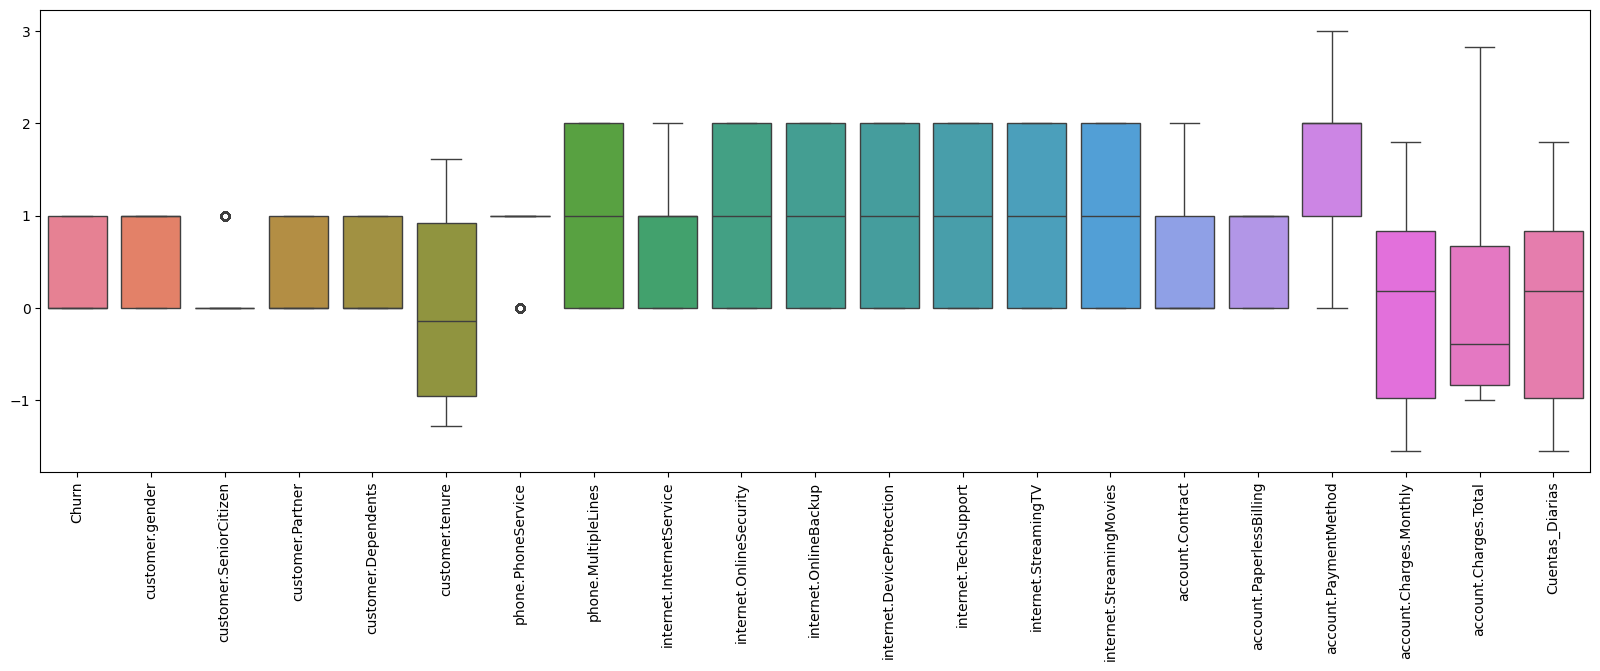

In [44]:
# Boxplots para outliers
plt.figure(figsize=(20,6))
sns.boxplot(data=df_estandarizado.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.show()

# Análisis de la evasión según variables categóricas

In [47]:
# análisis de la evasión según variables categóricas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv("df_estandarizado.csv")

In [59]:
# df_estandarizado['churn'] = df_estandarizado['churn'].map({0: 'Se dio de baja', 1: 'Permaneció'})

In [75]:
# Variables categóricas de interés
categorical_vars = ['customer.gender', 'account.Contract', 'account.PaymentMethod']

In [87]:
# Diccionarios de mapeo
contract_map = {
    0: 'Month-to-month',
    1: 'One year',
    2: 'Two year'
}

payment_map = {
    0: 'Bank transfer (automatic)',
    1: 'Credit card (automatic)',
    2: 'Electronic check',
    3: 'Mailed check'
}

gender_map = {
    0: 'Female',
    1: 'Male'
}

churn_map = {
    0: 'Permaneció',
    1: 'Se dio de baja'
}

In [89]:
# Función para plotear distribución de churn por categoría
def plot_churn_by_category(df, cat_var):
    # Aplica mapeo si corresponde
    if cat_var == 'account.Contract':
        df_plot = df.copy()
        df_plot[cat_var] = df_plot[cat_var].map(contract_map)
    elif cat_var == 'account.PaymentMethod':
        df_plot = df.copy()
        df_plot[cat_var] = df_plot[cat_var].map(payment_map)
    elif cat_var == 'customer.gender':
        df_plot = df.copy()
        df_plot[cat_var] = df_plot[cat_var].map(gender_map)
    elif cat_var == 'Churn':
        df_plot = df.copy()
        df_plot[cat_var] = df_plot[cat_var].map(churn_map)
    else:
        df_plot = df.copy()

    df_plot['Churn'] = df_plot['Churn'].map(churn_map)

    plt.figure(figsize=(6,4))
    ct = pd.crosstab(df_plot[cat_var], df_plot['Churn'], normalize='index') * 100
    ct.plot(kind='bar',
            stacked=True,
            colormap='Set2',
            edgecolor='k')

    plt.title(f"% Churn según {cat_var.replace('_',' ').title()}")
    plt.ylabel("Porcentaje de clientes")
    plt.xticks(rotation=90, ha='right')

    for i, category in enumerate(ct.index):
        for j, churn_label in enumerate(ct.columns):
            pct = ct.loc[category, churn_label]
            plt.text(
                x = i,
                y = ct.iloc[i, :j].sum() + pct/2,
                s = f"{pct:.1f}%",
                ha='center',
                va='center',
                color='white',
                fontsize=10
            )

    plt.legend(title="Status de churn", bbox_to_anchor=(1.0, 1.0))
    plt.tight_layout()
    plt.show()

In [ ]:
# Mostrar la fila donde account.Charges.Total es igual a 867245
# display(df_cod[df_cod['account.Charges.Total'] == 2078.95])

<Figure size 600x400 with 0 Axes>

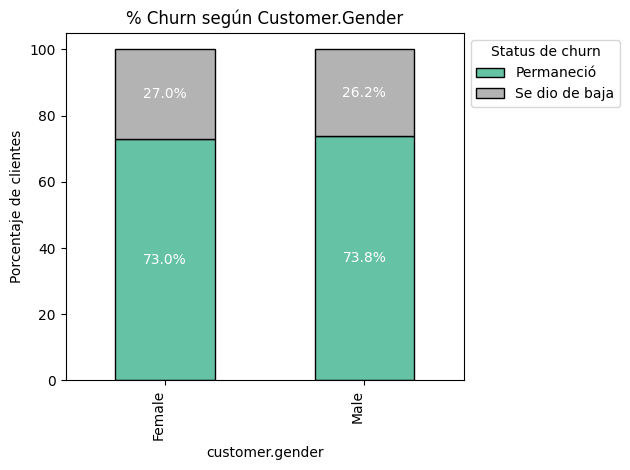

<Figure size 600x400 with 0 Axes>

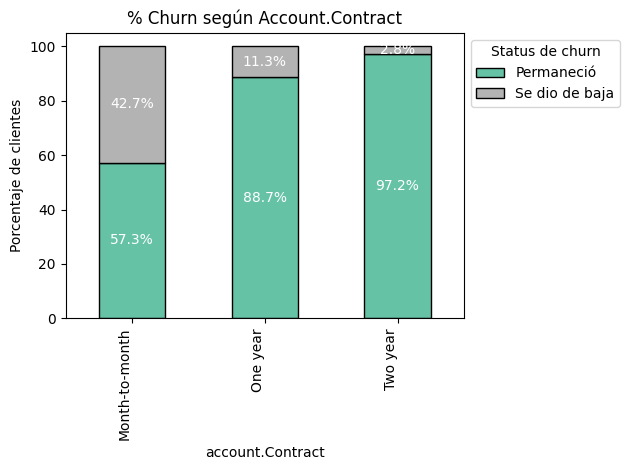

<Figure size 600x400 with 0 Axes>

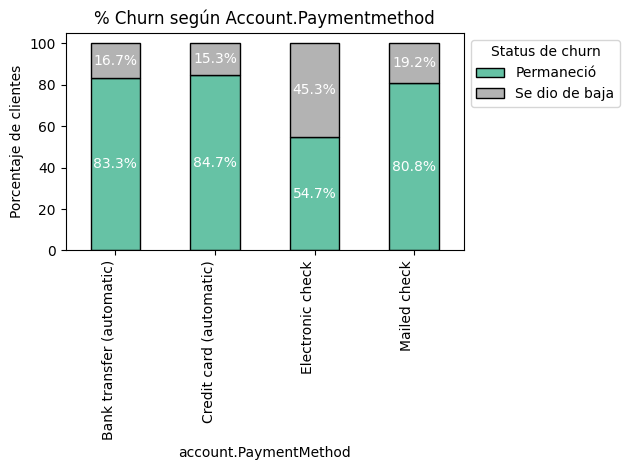

In [90]:
# Dibujar un gráfico por variable
for var in categorical_vars:
    plot_churn_by_category(df, var)

# Análisis de la evasión según variables numéricas

In [92]:
# Variables numéricas de interés
numeric_vars = ['account.Charges.Total', 'customer.tenure']  # total gastado y tiempo de contrato

/tmp/ipython-input-3540414997.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn')


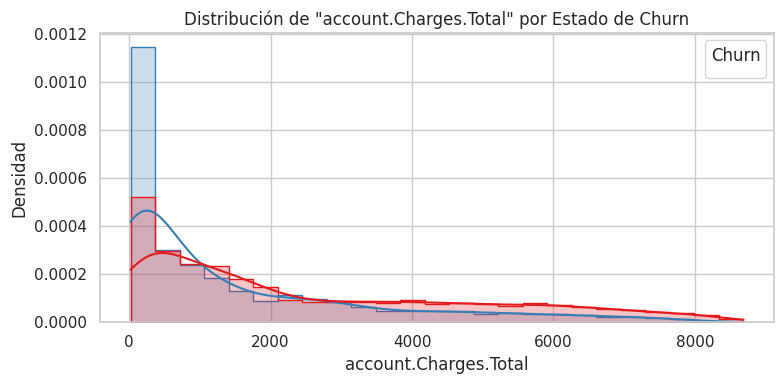

/tmp/ipython-input-3540414997.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn')


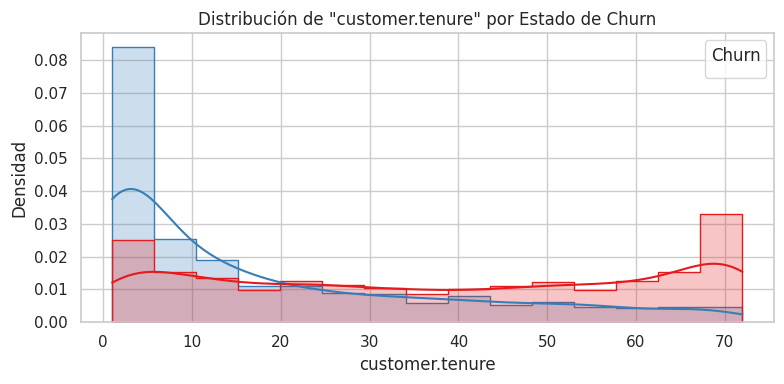

In [107]:
# Histograma con KDE para comparar densidades
sns.set(style="whitegrid")
for var in numeric_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(
        data=df_cod,
        x=var,
        hue='Churn',
        stat='density',
        common_norm=False,
        kde=True,
        palette='Set1',
        element='step'
    )
    plt.title(f'Distribución de "{var}" por Estado de Churn')
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

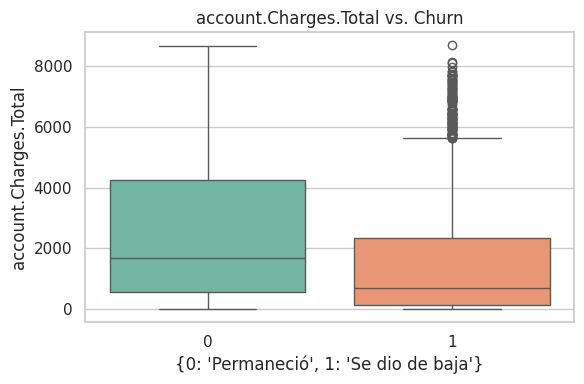

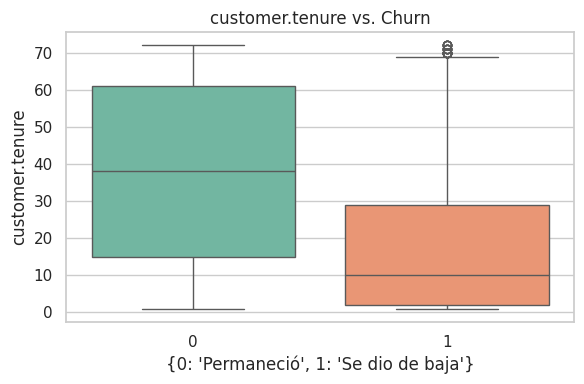

In [105]:
# Boxplot para comparar rangos y outliers
for var in numeric_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=df_cod,
        x='Churn',
        y=var,
        hue='Churn',
        palette='Set2',
        legend=False
    )
    plt.title(f'{var} vs. Churn')
    plt.xlabel(churn_map)
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

#📄Informe final

# Informe Final – Análisis de Churn en Telecom X

---

## Introducción

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (churn) en Telecom X y proporcionar insights accionables para reducir la tasa de cancelaciones. A través de la importación, limpieza y exploración de datos de clientes, buscamos identificar patrones de comportamiento y características asociadas a la fuga, de manera que el equipo de Data Science pueda desarrollar modelos predictivos y estrategias de retención eficaces.

---

## Limpieza y Tratamiento de Datos

1. **Importación**  
   - Carga de `TelecomX_Data.json` en un DataFrame de pandas.  
   - Conversión de valores numéricos almacenados como texto (por ejemplo, espacios en `account.Charges.Total`) a `float64`.

2. **Normalización de texto**  
   - Todas las columnas de tipo `object` pasaron a minúsculas.  
   - Eliminación de espacios iniciales/finales y signos de puntuación para homogeneizar categorías.

3. **Codificación categórica**  
   - **LabelEncoder** en variables con ≤ 10 valores únicos (por ejemplo `gender`, `Partner`, `Dependents`).  
   - Resultado: DataFrame `df_cod` con columnas numéricas listas para modelado.

4. **Nuevas variables**  
   - **Cuentas_Diarias**: cálculo de cargo promedio diario = `Charges.Monthly / 30`.  
   - **Transformación logarítmica**: se generó `df_loga`, aplicando log(▿) a todas las columnas numéricas positivas, para atenuar skew y estabilizar varianzas.

---

## Análisis Exploratorio de Datos

### Distribución de Churn

![Distribución de Churn](attachment:churn_distribution.png)

La variable objetivo muestra dos grupos:  
- Clientes que permanecieron  
- Clientes que se dieron de baja  

Visualmente, se observa que la proporción de clientes que se dan de baja es aproximadamente un tercio del total, indicando una tasa de churn significativa.

---

### Churn vs Variables Categóricas

Para cada categoría clave (género, tipo de contrato, método de pago), generamos barras apiladas con porcentajes:

- **Género**  
  - Tasa de evasión ligeramente mayor en un género, sugiriendo posibles diferencias de experiencia o preferencia en el servicio.

- **Tipo de contrato**  
  - Los contratos mes a mes presentan la tasa de churn más alta, mientras que los contratos a uno y dos años muestran mayor fidelidad.

- **Método de pago**  
  - El débito automático retiene mejor a los clientes, comparado con pagos manuales.

---

### Churn vs Variables Numéricas

Se graficaron histogramas con KDE y boxplots para `Charges.Total` (gasto total) y `tenure` (meses de contrato):

- Los clientes que se dieron de baja tienden a tener menor antigüedad (`tenure`) y menor gasto total acumulado.
- Existe un pequeño grupo de outliers con alto gasto que también cancelan, lo que podría indicar insatisfacción pese a nivel de consumo.

---

## Conclusiones e Insights

- Los contratos mes a mes concentran la mayor proporción de churn.  
- Mayor fidelidad observada en clientes con planes anuales o bianuales.  
- El débito automático como método de pago está asociado a menor tasa de fuga.  
- Clientes con bajo `tenure` y bajo gasto total muestran mayor riesgo de evasión, lo que sugiere enfocar campañas de retención temprana.

---

## Recomendaciones

- **Incentivar renovaciones anticipadas**  
  Ofrecer descuentos o beneficios a clientes mes a mes para migrar a contratos anuales.

- **Promover débito automático**  
  Destacar conveniencia y posibles bonificaciones al adoptar pago automático.

- **Onboarding focalizado**  
  Implementar programas de bienvenida y seguimiento en los primeros 3–6 meses para clientes nuevos, mitigando el churn temprano.

- **Segmentación avanzada**  
  Desarrollar modelos predictivos usando `df_loga` para detectar clientes con bajo gasto diario o baja antigüedad y lanzar campañas personalizadas.

- **Monitoreo continuo**  
  Automatizar reportes semanales de churn por segmento y ajustar tácticas según las tendencias emergentes.

---

Con estos hallazgos y acciones recomendadas, Telecom X contará con una base sólida para reducir la evasión y mejorar su retención de clientes.  
